# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import requests
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

    
# Print the city count to confirm sufficient count
print(len(cities))
# #print(cities)
# print("*******************************************************************************************")
# print("Temporarily reducging cities from cities to cities[0:30] so only get 30 cities intially")
# print("before calling api.openweathermap.org since they have limits") 
# print("I believe 60 calls/minute and 1M calls/month per month)")
# cities = cities[0:30]
# print("*******************************************************************************************")
# print(cities)

607


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
lat = []
lon = []
temp = []
temp_max = []
humidity=[]
clouds=[]
wind=[]
country = []
dt = []

del_cities = []
del_cities_index = []
i = 0
city_counter=0
number_valid_cities=1

# print("*******************************************************************************************")
# print("Temporarily reducging cities from cities to cities[0:30] so only get 30 cities intially")
# print("before calling api.openweathermap.org since they have limits") 
# print("I believe 60 calls/minute and 1M calls/month per month)")
# cities = cities[0:3]
# print("*******************************************************************************************")

#print("cities")
#print(cities)
# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("---------------------------------")
for city in cities:
    #print(f'city is {city}')
    try:
        response = requests.get(query_url + city).json()
        time.sleep(0.01)
        lat.append(response['coord']['lat'])
        #print(f"The latitude information for city {city} #{city_counter} received is: {lat}")
        lon.append(response['coord']['lon'])
        #print(f"The longitude information for city {city} #{city_counter} received is: {lon}")
        temp.append(response['main']['temp'])
        #print(f"The temperature information for city {city} #{city_counter} received is: {temp}")
        temp_max.append(response['main']['temp_max'])
        #print(f"The temperature Maximum information for city {city} #{city_counter} received is: {temp_max}")
        humidity.append(response['main']['humidity'])
        #print(f"The humidty information for city {city} #{city_counter} received is: {humidity}")
        clouds.append(response['clouds']['all'])
        #print(f"The cloudiness information for city {city} #{city_counter} received is: {clouds}")
        wind.append(response['wind']['speed'])
        #print(f"The windiness information for city {city} #{city_counter} received is: {wind}")
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        print(f'Processing city #{number_valid_cities} for city named {city}')
        number_valid_cities += 1
        
    except KeyError:
        print()
        print("Oops! City not found, removing the invalid city from cities")
        #print(f'Issue with {city} of index {city_counter}')
        del_cities_index.append(city_counter)
        #print('len(del_cities_index)')
        #print(len(del_cities_index))        
        
    city_counter+=1
# print('cities')
# print(cities)
# print('dt')
# print(dt)

#print('len(del_cities_index)')
#print(len(del_cities_index))

if len(del_cities_index)>0:
    #print("inside if")
    for i in range(len(del_cities_index)-1, -1, -1):
        #print("inside for")
        #print(f'i={i}')
        #print(f'del_cities_index[i]')
        #print(del_cities_index[i])
        j=int((del_cities_index[i]))
        #print(f'j={j}')
        del cities[j]
#print('cities after del')
#print(cities)

# from the list
#print(f'cities is now {cities}')
#print()
    
# # Build query URL
# query_url = url + "appid=" + weather_api_key + "&q=" + city  

# # Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + 'cape town'  

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

print("---------------------------------")
print("Data Retrevial Complete")
print("---------------------------------")

# # Get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")

Beginning Data Retrieval
---------------------------------
Processing city #1 for city named carnarvon
Processing city #2 for city named qaanaaq
Processing city #3 for city named busselton
Processing city #4 for city named ushuaia
Processing city #5 for city named saskatoon

Oops! City not found, removing the invalid city from cities
Processing city #6 for city named tyukhtet
Processing city #7 for city named narsaq
Processing city #8 for city named tiksi
Processing city #9 for city named codrington
Processing city #10 for city named wlodawa
Processing city #11 for city named berlevag

Oops! City not found, removing the invalid city from cities
Processing city #12 for city named punta arenas
Processing city #13 for city named port macquarie
Processing city #14 for city named nanortalik
Processing city #15 for city named rikitea

Oops! City not found, removing the invalid city from cities
Processing city #16 for city named poum
Processing city #17 for city named vaini
Processing city #1

Processing city #166 for city named sao filipe

Oops! City not found, removing the invalid city from cities
Processing city #167 for city named guane
Processing city #168 for city named caravelas
Processing city #169 for city named uyskoye
Processing city #170 for city named cihuatlan
Processing city #171 for city named arraial do cabo
Processing city #172 for city named haines junction

Oops! City not found, removing the invalid city from cities
Processing city #173 for city named flinders
Processing city #174 for city named severo-kurilsk
Processing city #175 for city named rawson
Processing city #176 for city named tasiilaq
Processing city #177 for city named korla
Processing city #178 for city named ejido
Processing city #179 for city named saryozek
Processing city #180 for city named baruun-urt

Oops! City not found, removing the invalid city from cities
Processing city #181 for city named tambopata
Processing city #182 for city named cabra
Processing city #183 for city named san 

Processing city #323 for city named anse-bertrand
Processing city #324 for city named oarai
Processing city #325 for city named miandrivazo
Processing city #326 for city named khandyga
Processing city #327 for city named schwaigern

Oops! City not found, removing the invalid city from cities
Processing city #328 for city named mayo

Oops! City not found, removing the invalid city from cities
Processing city #329 for city named qaqortoq
Processing city #330 for city named ambunti
Processing city #331 for city named kita
Processing city #332 for city named machico
Processing city #333 for city named lappeenranta
Processing city #334 for city named megion
Processing city #335 for city named independenta
Processing city #336 for city named lazaro cardenas
Processing city #337 for city named vilyuysk

Oops! City not found, removing the invalid city from cities
Processing city #338 for city named saint-francois
Processing city #339 for city named quatre cocos
Processing city #340 for city na

Processing city #488 for city named castellammare del golfo
Processing city #489 for city named gobabis
Processing city #490 for city named kokopo
Processing city #491 for city named oktyabrskiy
Processing city #492 for city named port lincoln
Processing city #493 for city named adrar
Processing city #494 for city named talcahuano
Processing city #495 for city named yuanping
Processing city #496 for city named nongstoin
Processing city #497 for city named ionia
Processing city #498 for city named prince rupert
Processing city #499 for city named bahia honda

Oops! City not found, removing the invalid city from cities
Processing city #500 for city named balikpapan

Oops! City not found, removing the invalid city from cities

Oops! City not found, removing the invalid city from cities
Processing city #501 for city named jiancheng
Processing city #502 for city named urucui
Processing city #503 for city named lukulu
Processing city #504 for city named otjimbingwe
Processing city #505 for c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

 # create a data frame from cities, lat, temp, etc
#print(f'City {cities}')
#print(f'Lat {lat}')
      
weather_dict = {
    "city": cities,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "TempMax": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed":wind,
    "Country":country,
    "Date":dt
}

# print("weather_dict")
# print(weather_dict)
# print()

weather_data = pd.DataFrame(weather_dict)
# print(weather_data)

# Save as a csv
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

# Display the DataFrame
weather_data.head()

,city,lat,lon,temp,TempMax,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-24.8667,113.6333,26.04,26.04,73,100,3.09,AU,1644522355
1,qaanaaq,77.4840,-69.3632,-29.36,-29.36,57,8,3.30,GL,1644522218
2,busselton,-33.6500,115.3333,15.02,18.94,62,0,2.09,AU,1644522355
3,ushuaia,-54.8000,-68.3000,7.81,10.79,71,75,13.89,AR,1644522355
4,saskatoon,52.1168,-106.6345,5.51,5.65,75,40,11.83,CA,1644522265


In [24]:
# Display the DataFrame
weather_data.describe()

,lat,lon,temp,TempMax,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,20.013992,19.928948,10.601935,11.008100,70.681004,58.324373,3.567742,1.644522e+09
std,33.361794,90.351324,17.922559,17.980756,23.002272,40.904194,2.627924,9.703016e+01
min,-54.800000,-179.166700,-41.500000,-41.500000,1.000000,0.000000,0.000000,1.644522e+09
25%,-6.722275,-63.254150,0.897500,1.390000,58.000000,12.250000,1.540000,1.644522e+09
50%,24.893750,23.396000,16.245000,17.310000,76.000000,75.000000,2.975000,1.644522e+09
75%,47.749050,99.834850,24.755000,25.045000,88.000000,100.000000,4.995000,1.644523e+09
max,78.218600,178.416700,37.950000,37.950000,100.000000,100.000000,13.890000,1.644523e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 


In [26]:
cities_high_humidity = []
city_counter=0
for city in cities:
    if int(humidity[city_counter]) >100:
        #print(f"The humidty information for city {city} #{city_counter} received is: {humidity[city_counter]}")
        # Create a new list to track high humifity index values
        cities_high_humidity.append(city_counter)
        #print(f"{city} with city_counter of {city_counter} has humidty >80 so need to remove later")
        city_counter+=1
    else:
        # print("Skip since no humidity >100")
        city_counter+=1
#print("Latest cities_high_humidity")
#print(cities_high_humidity)

In [27]:
#  Get the indices of cities that have humidity over 100%.
#print("Latest cities_high_humidity")
cities_high_humidity

[]

In [28]:
# Make a new DataFrame equal to the city data (aka weather_data) to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data
if len(cities_high_humidity) > 0:
    print(f"have high humidity data for city index #(s) {cities_high_humidity}")
    # dropping a row(s) from actual dataframe
    #df.drop(['c', 'd'], inplace = True )
    clean_city_data=clean_city_data.drop(cities_high_humidity, inplace=False) 
# else:
#     print("No high humidity data") 
# print("weather_data") 
# print(weather_data)
# print()
# print("clean_city_data") 
# print(clean_city_data)
# print()

clean_city_data.reset_index(inplace=True)
#print("clean_city_data after reset index") 
clean_city_data


,index,city,lat,lon,temp,TempMax,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,carnarvon,-24.8667,113.6333,26.04,26.04,73,100,3.09,AU,1644522355
1,1,qaanaaq,77.4840,-69.3632,-29.36,-29.36,57,8,3.30,GL,1644522218
2,2,busselton,-33.6500,115.3333,15.02,18.94,62,0,2.09,AU,1644522355
3,3,ushuaia,-54.8000,-68.3000,7.81,10.79,71,75,13.89,AR,1644522355
4,4,saskatoon,52.1168,-106.6345,5.51,5.65,75,40,11.83,CA,1644522265
...,...,...,...,...,...,...,...,...,...,...,...
553,553,koungheul,13.9833,-14.8000,30.28,30.28,9,76,4.57,SN,1644522572
554,554,baherden,38.4362,57.4316,14.50,14.50,28,100,2.44,TM,1644522572
555,555,brigantine,39.4101,-74.3646,13.41,15.15,33,75,8.23,US,1644522572
556,556,amazar,53.8580,120.8750,-20.55,-20.55,96,100,1.55,RU,1644522573


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

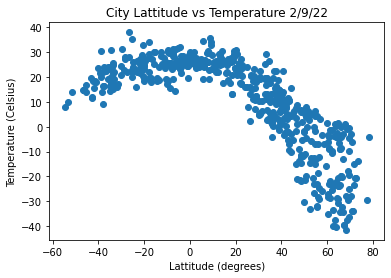

In [29]:
# print("clean_city_data") 
# print(clean_city_data)

# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["temp"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('City Lattitude vs Temperature 2/9/22')
# Save the figure
plt.savefig("output_data/lat_temp.png")
# Display the garph
plt.show()

## Latitude vs. Humidity Plot

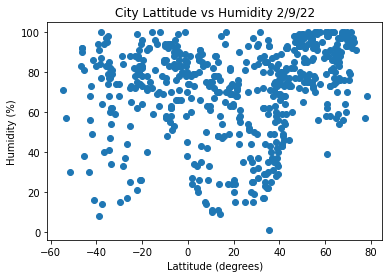

In [30]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Humidity"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title('City Lattitude vs Humidity 2/9/22')

# Save the figure
plt.savefig("output_data/lat_hum.png")
# Display the garph
plt.show()

## Latitude vs. Cloudiness Plot

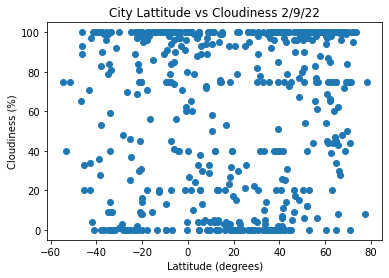

In [31]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Cloudiness"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title('City Lattitude vs Cloudiness 2/9/22')
# Save the figure
plt.savefig("output_data/lat_cloud.png")
# Display the garph
plt.show()

## Latitude vs. Wind Speed Plot

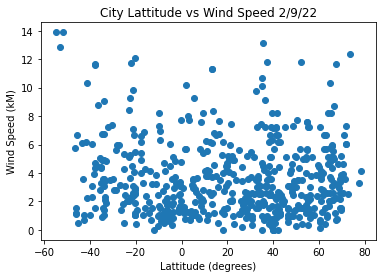

In [32]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Wind Speed"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Wind Speed (kM)")
plt.title('City Lattitude vs Wind Speed 2/9/22')
# Save the figure
plt.savefig("output_data/lat_wind.png")
# Display the garph
plt.show()

## Linear Regression

The correlation between both factors is -0.75
The r-value is: -0.7475302703855974
line_eq is: y = -0.4x + 18.64


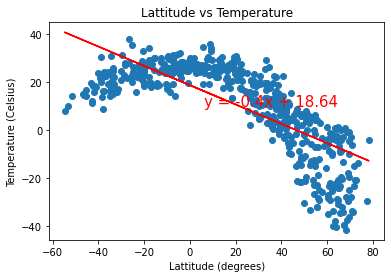

In [33]:
# Calculate the correlation coefficient and linear regression model 

x_values = clean_city_data["lat"]
y_values = clean_city_data["temp"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8511342143236897
line_eq is: y = -0.8x + 36.27


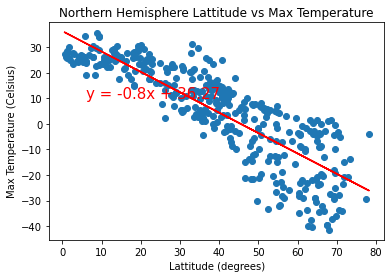

In [34]:
# Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
# Southern Hemisphere (less than 0 degrees latitude)
# After each pair of plots, take the time to explain what the linear regression is modeling. 
# For example, describe any relationships you notice and any other analysis you may have.

# Set-up and initialize variables 
city_counter = 0
northern_city_counter = 0
southern_city_counter = 0
northern_hemisphere_city = []
southern_hemisphere_city = []
      
# Make a new DataFrame equal to the city data (aka weather_data) to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
northern_hemisphere_data = clean_city_data
southern_hemisphere_data = clean_city_data

# Create Northen Hemisphere and Southern Hemisphere lists
for city_counter in range(0, len(clean_city_data)):
    if clean_city_data["lat"][city_counter] >= 0:
        northern_hemisphere_city.append(city_counter)

        # Drop southern_hemisphere_data point from northern_hemisphere_data    
        southern_hemisphere_data=southern_hemisphere_data.drop(city_counter, inplace=False)

    else:
        # Southern_hemisphere_city
        southern_hemisphere_city.append(city_counter)

        # Drop southern_hemisphere_data point from northern_hemisphere_data      
        northern_hemisphere_data=northern_hemisphere_data.drop(city_counter, inplace=False)

    city_counter += 1 
                    
x_values = northern_hemisphere_data["lat"]
y_values = northern_hemisphere_data["TempMax"]

correlation = st.pearsonr(x_values,y_values)
#print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
#print("slope, intercept, rvalue, pvalue, stderr")
#print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Max Temperature (Celsius)")
plt.title('Northern Hemisphere Lattitude vs Max Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.53
The r-value is: 0.5284516482024786
line_eq is: y = 1.43x + -54.51


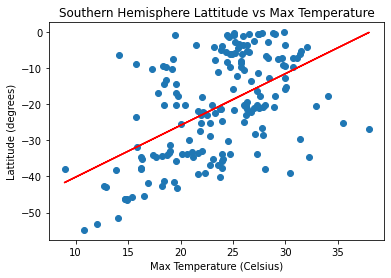

In [35]:
x_values = southern_hemisphere_data["TempMax"]
y_values = southern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')

# print("slope, intercept, rvalue, pvalue, stderr")
# print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Max Temperature (Celsius)")
plt.ylabel("Lattitude (degrees)")
plt.title('Southern Hemisphere Lattitude vs Max Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.44
The r-value is: 0.4377732712818387
line_eq is: y = 0.36x + 13.59


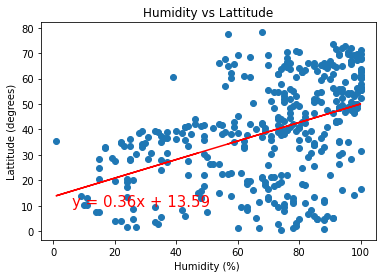

In [36]:
x_values = northern_hemisphere_data["Humidity"]
y_values = northern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
# print("slope, intercept, rvalue, pvalue, stderr")
# print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%) ")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.22
The r-value is: 0.21613950484384326
line_eq is: y = 0.15x + -31.69


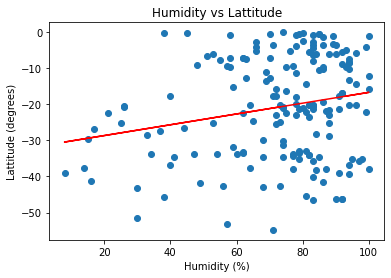

In [37]:
x_values = southern_hemisphere_data["Humidity"]
y_values = southern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
# print("slope, intercept, rvalue, pvalue, stderr")
# print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%)")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
time.sleep(0.5)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.32
The r-value is: 0.3163005627432738
line_eq is: y = 0.65x + 31.64


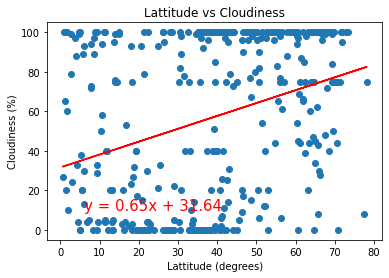

In [38]:
y_values = northern_hemisphere_data["Cloudiness"]
x_values = northern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
# print("slope, intercept, rvalue, pvalue, stderr")
# print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lattitude (degrees)")
plt.title('Lattitude vs Cloudiness')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.23
The r-value is: 0.22925009774465305
line_eq is: y = 0.65x + 74.8


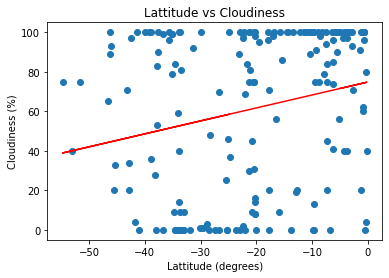

In [39]:
y_values = southern_hemisphere_data["Cloudiness"]
x_values = southern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lattitude (degrees)")
plt.title('Lattitude vs Cloudiness')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.44
The r-value is: 0.4377732712818387
line_eq is: y = 0.36x + 13.59


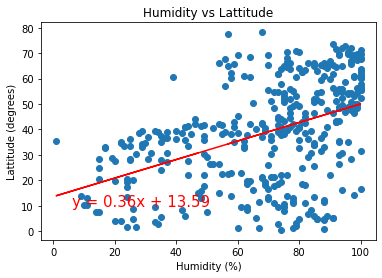

In [40]:
x_values = northern_hemisphere_data["Humidity"]
y_values = northern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%)")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.22
The r-value is: 0.21613950484384326
line_eq is: y = 0.31x + 79.34


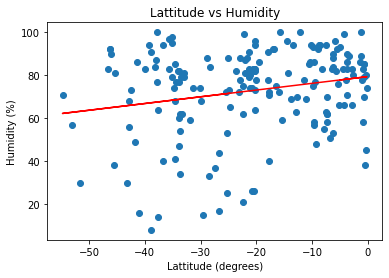

In [41]:
y_values = southern_hemisphere_data["Humidity"]
x_values = southern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Humidity (%)")
plt.xlabel("Lattitude (degrees)")
plt.title('Lattitude vs Humidity')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()